# Initial data check

This document is used for viewing and analyzing at the data different objects creates and playing around with how we should handle / use the data.

## Imports

In [147]:
# Use auto reload for helpers
%load_ext autoreload
%autoreload 1

# Liraries
import csv
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

# Import notebook helper module
%aimport scripts.helpers
helpers = scripts.helpers # %aimport seems to have problems with import .. as .. in modules??

# Add implementations to path
sys.path.insert(0, '../implementations')

# Import modules from implementations
%aimport data_transformation.standarize_ms

# Set matplotlib to display figures in notebook
%matplotlib inline

# Set graph style
matplotlib.style.use('ggplot')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fill data

In [148]:
raw_data = helpers.read_raw_data('../data/2016-07-16.csv')
raw_data[:3]

[['2016-07-16 21:33:01.216650', 'A', '2073', '0', '0', '0', '1', '0'],
 ['2016-07-16 21:33:01.216650', 'A', '3389', '0', '0', '1', '0', '0'],
 ['2016-07-16 21:33:12.560441', 'B', '5767', '6', '7', '6', '0', '0']]

#### Raw data format

0. Read identifier, unique for each "read" of values
1. Label - Identifier of object used to read data
2. MS since arduino started at read (will loop after 70 hours, see documentation
3. Sensor A0
4. Sensor A1
5. Sensor A2
6. Sensor A3
7. Sensor A4 (not interesting, dishwasher sensor)

### Split into readings

dict: key = reading, value = [reading]

In [149]:
raw_data_readings = helpers.split_data_based_on_readings(raw_data)
for k,v in raw_data_readings.items():
    print('reading {} has {} rows'.format(k, len(v)))

reading 2016-07-16 21:33:01.216650 has 2 rows
reading 2016-07-16 21:33:22.391406 has 117 rows
reading 2016-07-16 21:33:27.904313 has 106 rows
reading 2016-07-16 21:33:12.560441 has 95 rows


### Standarize the MS values to go from 0 ...

In [150]:
for v in raw_data_readings.values():
    data_transformation.standarize_ms(v, 2)

## Visualize readings

Note that readings from sensor a4 is not interesting at this time as this sensor is ment to measure the dishwasher...

On another note, the dishwasher should probably use a light sensor, so we might find a place for it! :)

### Reading 1

#### Create pandas dataframe

In [151]:
#id for current reading that is looked at
curr_reading_id = '2016-07-16 21:33:12.560441'

reading1_df = pd.DataFrame(data=raw_data_readings[curr_reading_id], columns=['identifier', 'label', 'ms', 'a0', 'a1', 'a2', 'a3', 'a4'])
reading1_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3', 'a4']].astype(float)

#### Add mean and max values

// TODO: Should be moved out to helpers, if data is helpful should be reusable when running final app.

In [152]:
reading1_df['mean'] = reading1_df[['a0','a1','a2','a3']].mean(axis=1)
reading1_df['max'] = reading1_df[['a0','a1','a2','a3']].max(axis=1)
reading1_df.head()

,ms,a0,a1,a2,a3,a4,mean,max
0,0.0,6.0,7.0,6.0,0.0,0.0,4.75,7.0
1,51.0,12.0,0.0,0.0,0.0,0.0,3.00,12.0
2,103.0,15.0,124.0,105.0,0.0,20.0,61.00,124.0
3,154.0,26.0,62.0,85.0,0.0,32.0,43.25,85.0
4,205.0,83.0,74.0,154.0,74.0,23.0,96.25,154.0


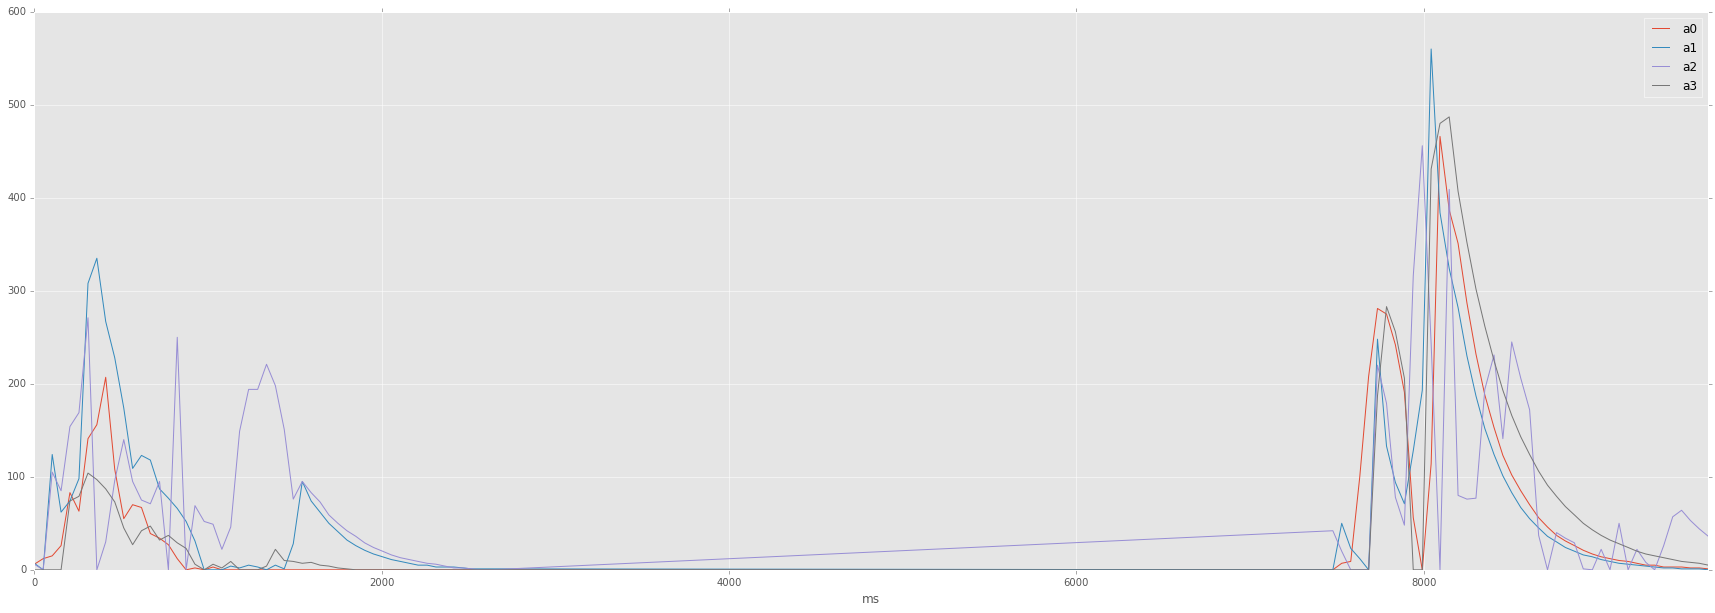

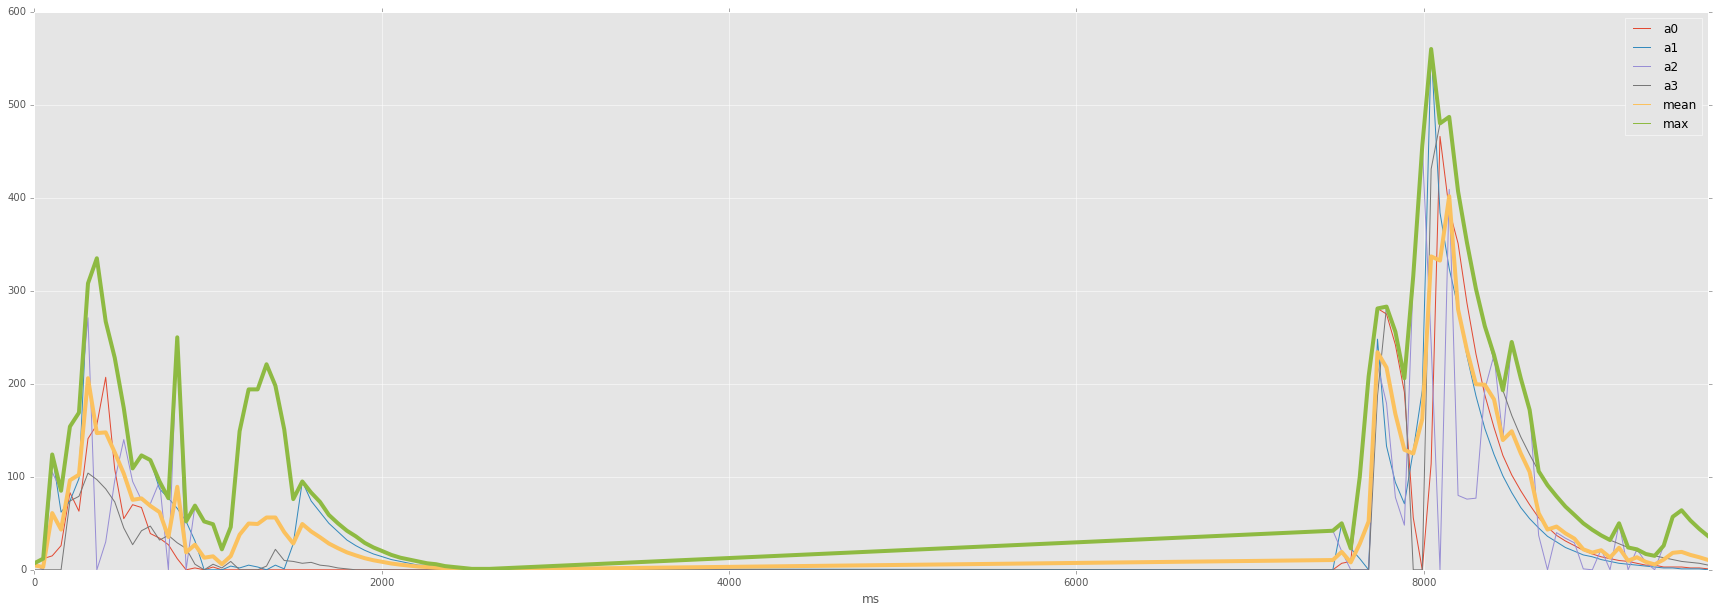

In [153]:
reading_1_a1_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3']]
ax = reading_1_a1_df.plot(x='ms', figsize=(30,10))
map(lambda x: x.set_linewidth(2), ax.lines)

reading1_a0_df = reading1_df[['ms', 'a0', 'a1', 'a2', 'a3', 'mean', 'max']]
ax = reading1_a0_df.plot(x='ms', figsize=(30,10))
map(lambda x: x.set_linewidth(2), ax.lines)
ax.lines[-1].set_linewidth(4)
ax.lines[-2].set_linewidth(4)